# Numba User Survey 2024

Author: https://github.com/esc

Welcome! [Numba](numba.pydata.org) is a Python Just-in-Time (JIT) compiler with a strong numerical focus and native support for compiling [NumPy](numpy.org) based code.

In March 2024 the Numba team conducted the first ever Numba User Survey. The Goal was to ask a few simple questions -- asking for about 5 minutes of attention -- in order to better understand a subset of the Numba user community. We, the core development team, wanted to know what sort of code is being accelerated with Numba, what features people enjoy and what features people think could be improved. Ultimately, the goal is for this data and the results to shape the Numba development roadmap and to have a tangible influence over the priorities. 

In this report I will only present the data and results of the user survey, speculating on what might be good avenues to explore and not commit to any actionable items just yet. Stay tuned!

Lastly, in the name of the community, I would like to say "Thank You!" to the 137 particpants who contributed their attention to our cause. 🙏

----

Note: this notebook and the raw CSV data can be found on Github: https://github.com/numba/numba-user-survey-2024

Orignal author of this report: https://github.com/esc

Many thanks to https://github.com/seibert for the original concept and design of the survey questions and to https://github.com/kc611, https://github.com/sklam and https://github.com/stuartarchibald for valuable feed during the design, execution and analysis phases of this survey. ❤️

In [1]:
import pandas as pd
import numpy as np
from matplotlib import colormaps

In [2]:
# disable a warning for this notebook
pd.set_option('future.no_silent_downcasting', True)

In [3]:
# get the Pastel1 colormap and remove the yellow as it doesn't look good on a white background
p1map = colormaps['Pastel1']
cmap = p1map.colors[:5] + p1map.colors[6:]

In [4]:
# Read the scrubbed CSV file
df = pd.read_csv("numba-user-survey-2024.scrubbed.csv", encoding="utf-8")

In [5]:
def extract_data(start, end):
    # get all columns that contain data for question
    d = df[df.columns[start:end]]
    # get the first line, which contains the answer options
    options = list(d.iloc[0:1].iloc[0])
    # Create a mapping from old column names to new ones
    column_name_map = dict(zip(list(d), options))
    # Fixup the column names
    d = d.rename(columns=column_name_map)
    return d, options

In [6]:
def extract_data_for_checkbox_question(start, end):
    d, options = extract_data(start, end)
    # Turn the object/string fields into numerical data
    d = d.replace(to_replace=options + [np.nan], value=[1] * len(options) + [0]).astype('float64')
    # strip the first line as it still conatins the answer options
    d = d.iloc[1:]
    # return final dataframe
    return d

In [7]:
def extract_data_for_ranking_question(start, end):
    d,options = extract_data(start, end)
    # strip the first line as it still conatins the answer options and convert to numerical data
    d = d.iloc[1:].astype("float64")
    # return final dataframe
    return d

In [55]:
def fixup_column_names_for_plotting(d):
    old = list(d.columns)
    new = []
    for s in old:
        new_string = []
        if len(s) <= 30:
            new_string.append(s)
        else:
            new_string.append(s[:30])
        if len(s) >= 31:
            new_string.append("" if s[30] == " " else "-")
            new_string.append("\n")
        if len(s) <= 58:
            new_string.append(s[30:])
        else:
            new_string.append(s[30:58] if s[30] != " " else s[31:58])
        if len(s) > 58:
            new_string.append("...")
        new.append("".join(new_string))
    return d.rename(columns=dict(zip(old, new)))

In [108]:
def plot_checkbox_question(frame, title="TBD"):
    frame = fixup_column_names_for_plotting(frame)
    figsize = (10, 10) if len(frame.columns) >= 15 else (10, 6)
    (frame.mean() * 100).plot.barh(title=title, color=cmap, figsize=figsize).invert_yaxis()

In [109]:
def plot_ranking_questions(frame, title="TBD", total_responses=137):
    frame = fixup_column_names_for_plotting(frame)
    ((((frame.sum() / total_responses) - 1) - 10) * -1).plot.barh(title=title, color=cmap, figsize=(10,7)).invert_yaxis()

# Q1

For Question 1 we asked: **How do you interact with the Numba project? (check all that apply)**

The possible responses were:

* I regularly use Numba to speed up Python code I have personally written.
* I maintain an open source project that depends on Numba.
* I maintain a proprietary or non-public project that depends on Numba (might be internal to your organization).
* I have contributed a pull request to Numba.
* I am a regular reader of the Numba discussion forums.
* I answer other people's questions about Numba on forums, StackOverflow, etc.
* I package Numba for distribution (conda, Linux distributions, homebrew, etc)

In [152]:
# Extract data and display percentage of responses
d1 = extract_data_for_checkbox_question(0, 7)

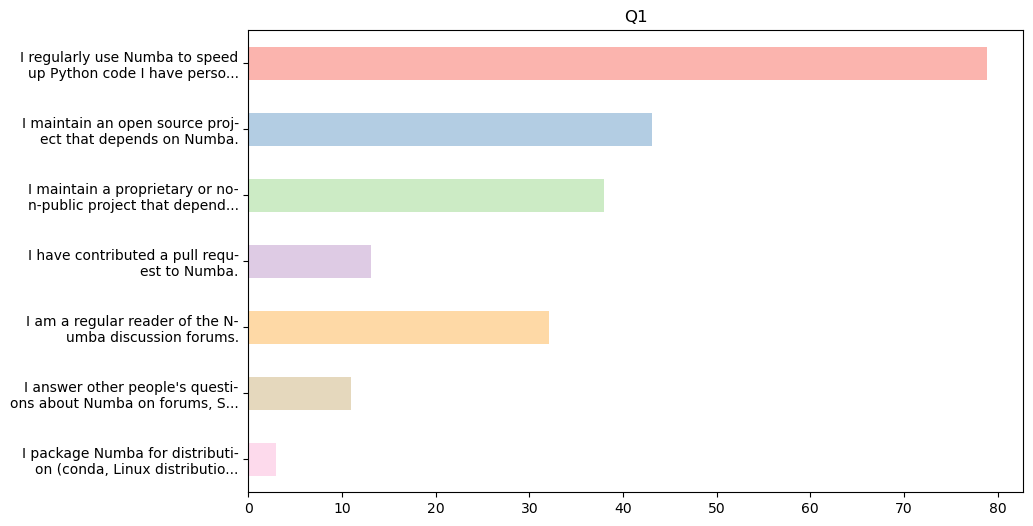

In [135]:
# Visualize the results
plot_checkbox_question(d1, title="Q1")

In [154]:
# Sorted numerical results
(d1.mean() * 100).sort_values()[::-1]

I regularly use Numba to speed up Python code I have personally written.                                          78.832117
I maintain an open source project that depends on Numba.                                                          43.065693
I maintain a proprietary or non-public project that depends on Numba (might be internal to your organization).    37.956204
I am a regular reader of the Numba discussion forums.                                                             32.116788
I have contributed a pull request to Numba.                                                                       13.138686
I answer other people's questions about Numba on forums, StackOverflow, etc.                                      10.948905
I package Numba for distribution (conda, Linux distributions, homebrew, etc)                                       2.919708
dtype: float64

Almost 80% of the participants responded that they regularly use Numba to speed up code they had personally written. 43% maintin an open source project that depends on Numba and a further 38% maintain a proprietary or non-public project that depends on Numba. Interestingly, 32% are regular readers of the Numba discourse, which is a good indicator that our dicsourse forum is accepted by the community.

# Q2

For Question 2 we asked **What kinds of applications do you use Numba for? (check all that apply)**.

The possible responses were:

* Hobby
* Educational projects
* Visualization
* Financial analytics
* Scientific research
* Compiler development
* Web-based microservices
* High performance computing on clusters
* Numerical simulations / "Digital Twins"
* Machine learning / AI
* Time series analysis
* Spatial / GIS data set processing

In [149]:
# Extract data and display percentage of responses
d2 = extract_data_for_checkbox_question(7, 19)

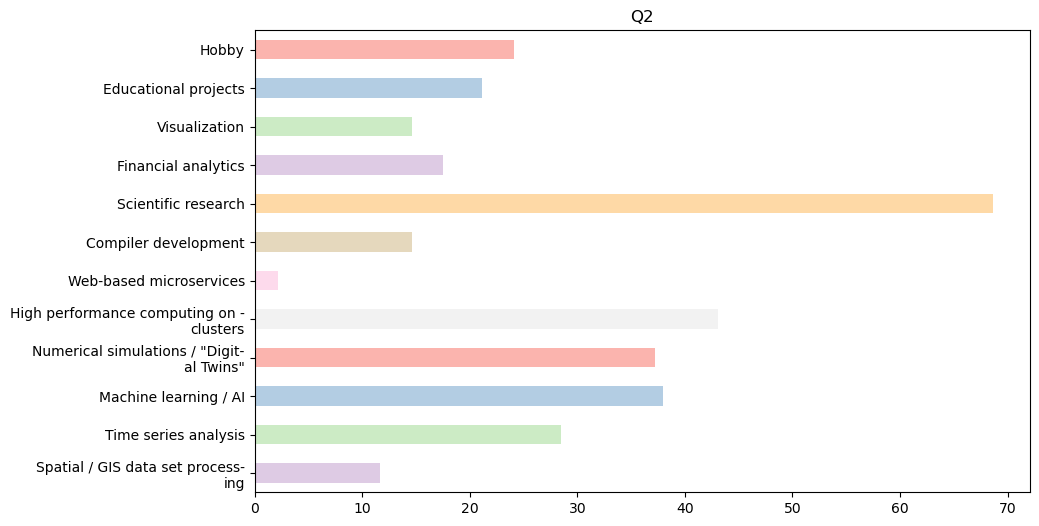

In [150]:
# Visualize the results
plot_checkbox_question(d2, title="Q2")

In [151]:
# Sorted numerical results
(d2.mean() * 100).sort_values()[::-1]

Scientific research                        68.613139
High performance computing on clusters     43.065693
Machine learning / AI                      37.956204
Numerical simulations / "Digital Twins"    37.226277
Time series analysis                       28.467153
Hobby                                      24.087591
Educational projects                       21.167883
Financial analytics                        17.518248
Compiler development                       14.598540
Visualization                              14.598540
Spatial / GIS data set processing          11.678832
Web-based microservices                     2.189781
dtype: float64

As you can see, almost 70% of participants use Numba for scientific research. This is great news! Perhaps this is a testament to the flexibility of Numba and it's usefulness in implementing cutting edge algorithms for which no framework or custom library exists yet. The second place with 43% is High Performance Computing, which may be closely linked to scientific computing. The next three most popular responses were Machine Learning / AI with 38%, Numerical Simulations with 37% and then time series analysis with 28%. These are all use-cases that we expected and it's good to see some evidence to support these use-cases. Lastly, 14.5% of participants also use it for compiler development and we hope that this use-case will become more popular as Numba transitions from a JIT-compiler to a compiler toolkit. 

# Q3

For Question 3 we asked **Which of the following Numba features have you found useful? (check all that apply)**

The possible responses were:

* Support for raising exceptions (raise statement)
* Support for catching exceptions (try-except statement)
* Support for generators
* Typed containers (typed.List, typed.Dict)
* Using NumPy functions in compiled code
* Compiling Python classes as structs using @jitclass
* Automatic multithreading with @jit(parallel=True) and/or prange()
* CUDA kernel compilation (@cuda.jit)
* Creating C callbacks with @cfunc
* Creating NumPy ufuncs with @vectorize or @guvectorize
* Creating stencil functions with @stencil
* Calling back into the Python interpreter using "with objmode"
* Caching of compiled functions to disk
* Ahead of time compilation (with numba.pycc)
* Debugging tools (gdb support, LLVM IR and assembly dumps, etc)
* Autovectorization
* The extension API (@overload, etc)
* First class function types (types.FunctionType)

In [155]:
d3 = extract_data_for_checkbox_question(19, 37)

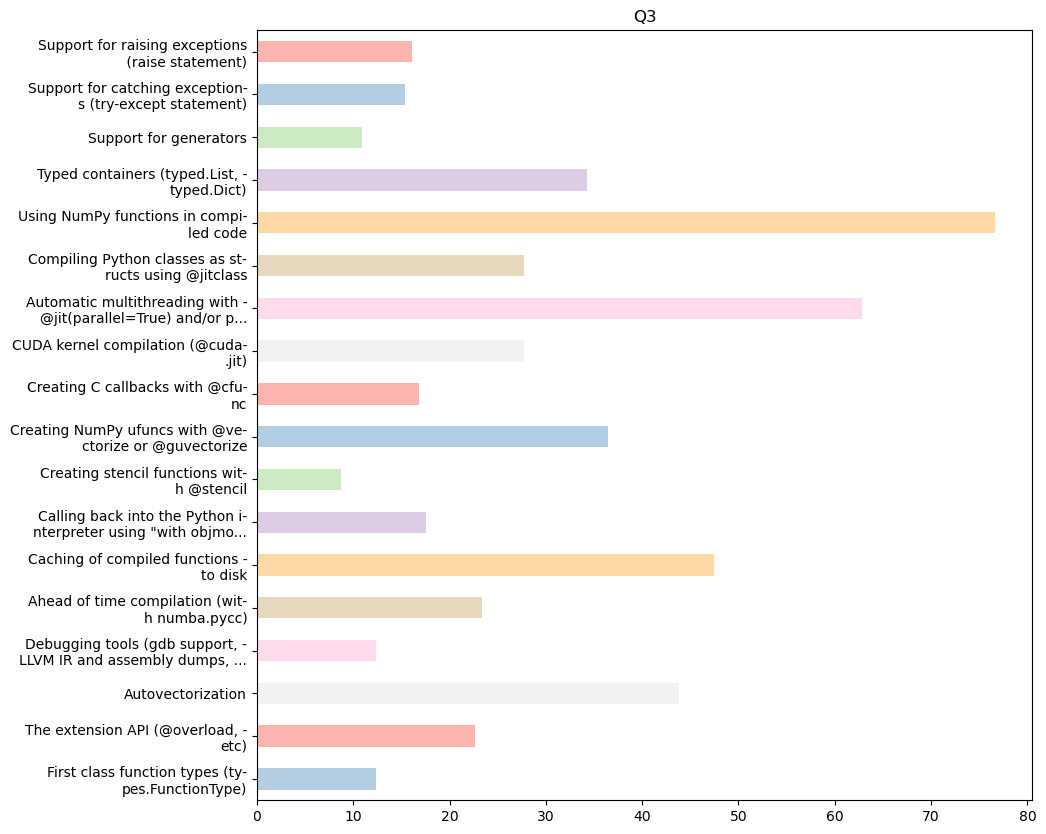

In [115]:
plot_checkbox_question(d3, title="Q3")

In [156]:
# Sorted numerical results
(d3.mean() * 100).sort_values()[::-1]

Using NumPy functions in compiled code                               76.642336
Automatic multithreading with @jit(parallel=True) and/or prange()    62.773723
Caching of compiled functions to disk                                47.445255
Autovectorization                                                    43.795620
Creating NumPy ufuncs with @vectorize or @guvectorize                36.496350
Typed containers (typed.List, typed.Dict)                            34.306569
Compiling Python classes as structs using @jitclass                  27.737226
CUDA kernel compilation (@cuda.jit)                                  27.737226
Ahead of time compilation (with numba.pycc)                          23.357664
The extension API (@overload, etc)                                   22.627737
Calling back into the Python interpreter using "with objmode"        17.518248
Creating C callbacks with @cfunc                                     16.788321
Support for raising exceptions (raise statement)    

The top result of the this question comes without surprises, after all Numba was created initially as a NumPy compiler. It's good to see that it remains widely used to satisfy this use-case.

# Q4

In [116]:
d4 = extract_data_for_checkbox_question(37, 55)

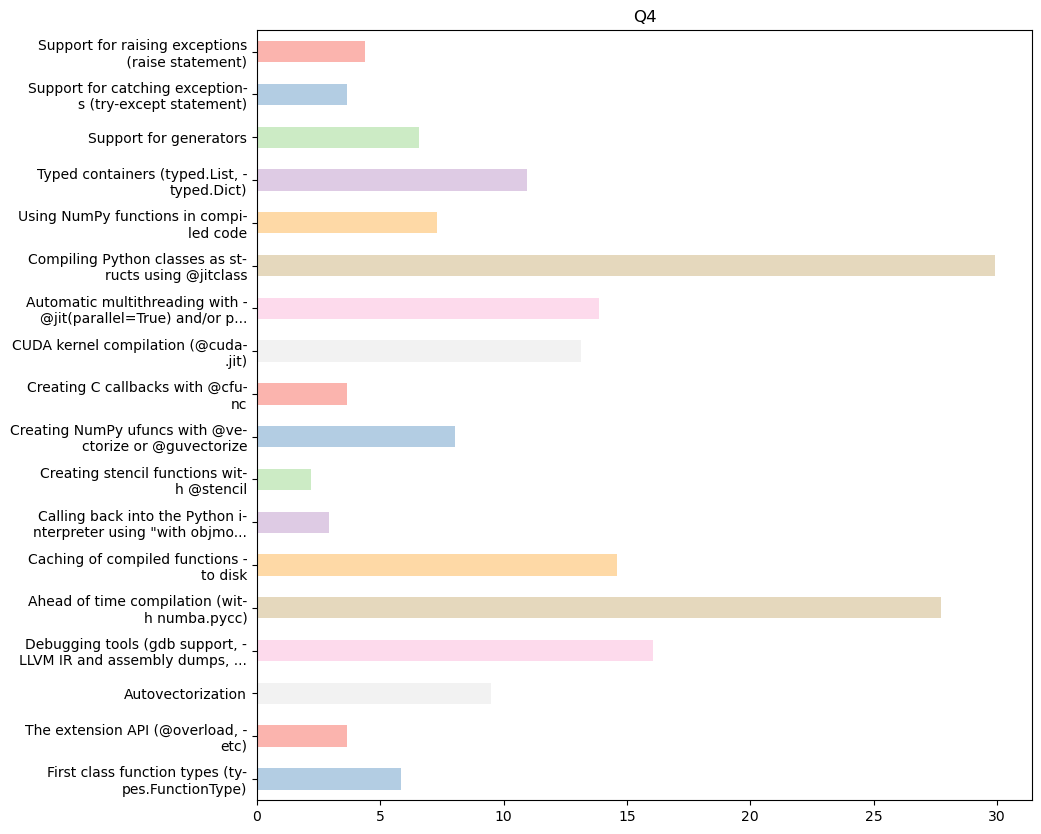

In [117]:
plot_checkbox_question(d4, title="Q4")

# Q5

In [118]:
d5 = extract_data_for_checkbox_question(55, 73)

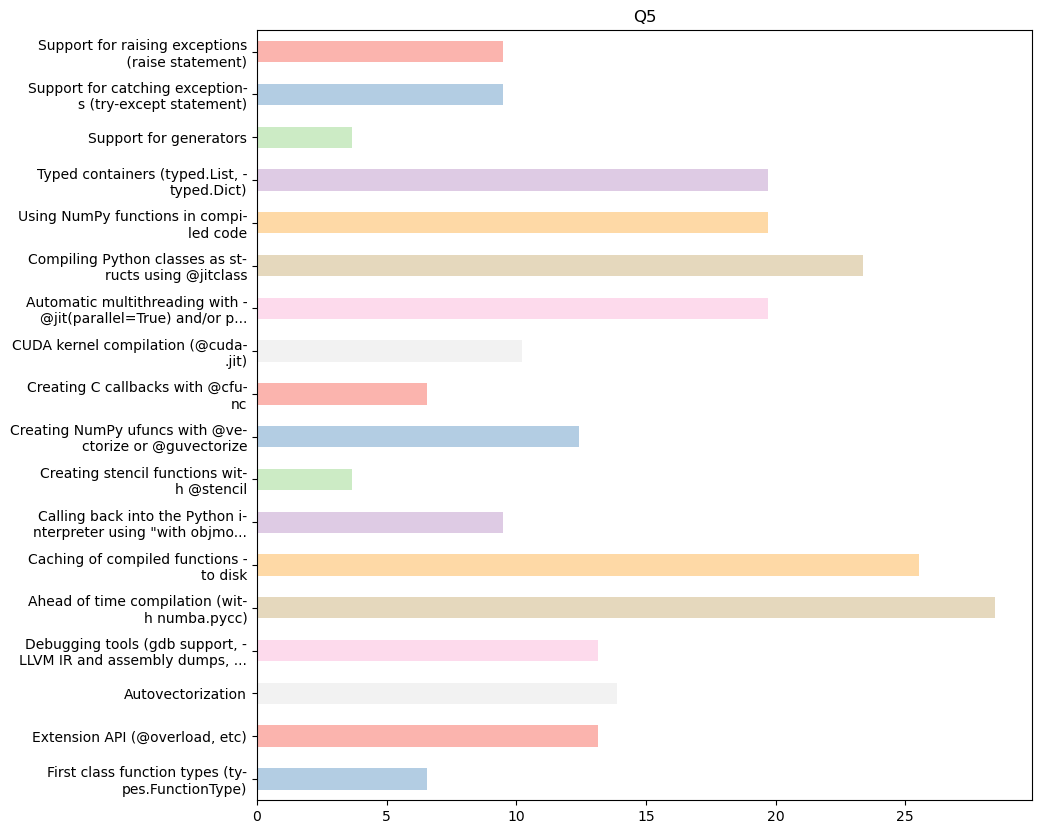

In [119]:
plot_checkbox_question(d5, title="Q5")

# Q6

In [120]:
d6 = extract_data_for_ranking_question(73, 83)

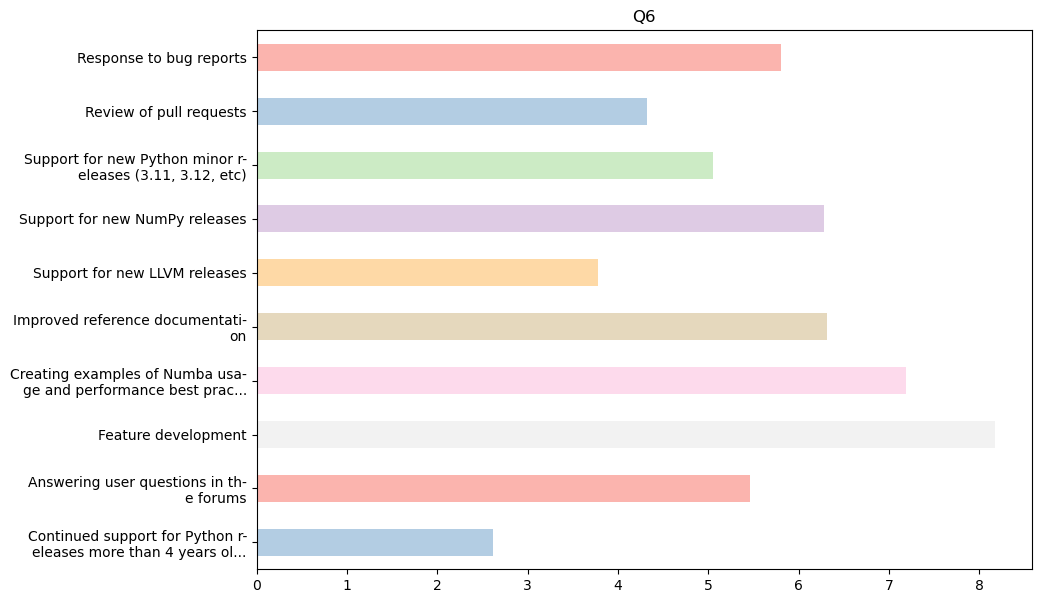

In [121]:
plot_ranking_questions(d6, title="Q6", total_responses=135)

# Q7

In [122]:
d7 = extract_data_for_ranking_question(83, 94)

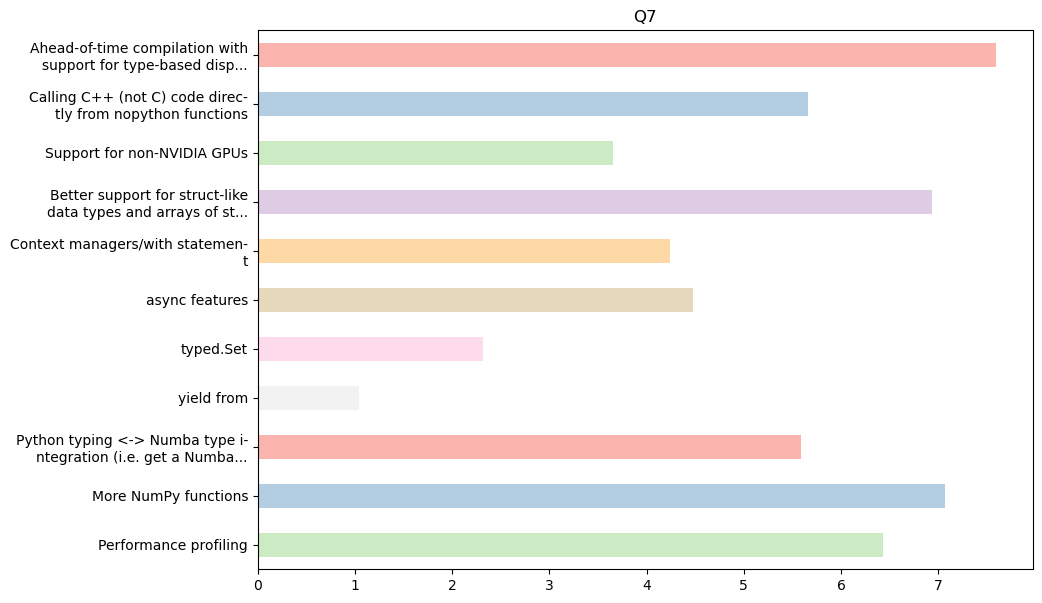

In [123]:
plot_ranking_questions(d7, title="Q7", total_responses=135)

# Q8

In [125]:
df[df.columns[94]].iloc[1:].replace(to_replace=["Yes", "No"], value=[1, 0]).sum()

10

# Q9

In [124]:
d9 = extract_data_for_checkbox_question(96, 100).astype(int)
d9.sum()

Learning about compilers                            4
Compiler research                                   4
Building Python compilers (other than Numba)        5
Building non-Python or domain specific compilers    5
dtype: int64

# Q10

In [126]:
d10 = extract_data_for_checkbox_question(100, 107)

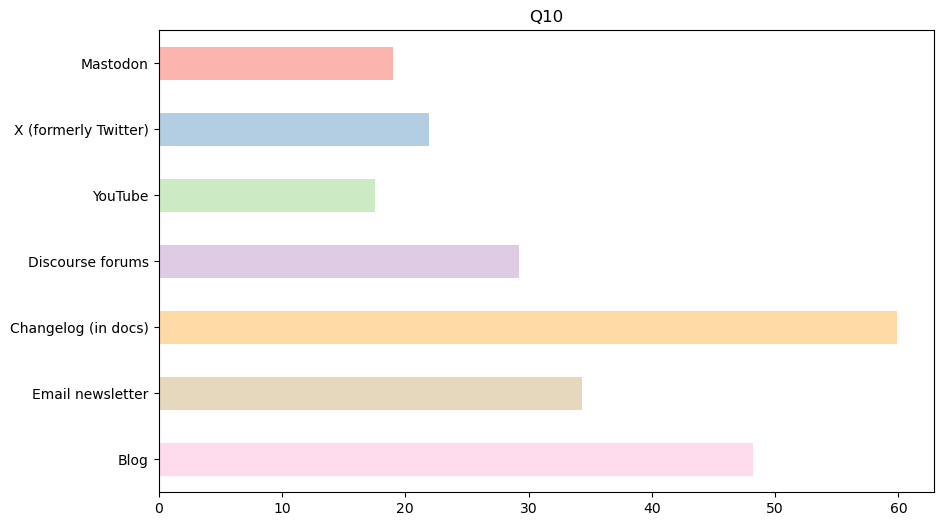

In [127]:
plot_checkbox_question(d10, title="Q10")